# 1. code

In [4]:
# In this problem, you will define a function, boggle_words(), that takes a board as input and returns a set of words that
# can be made from the board according to the rules of Boggle.

LETTERS = list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')

def is_letter(sq):                                                 #判定是否是string & 是否在LETTERS中
    
    return isinstance(sq, str) and sq in LETTERS      

def boggle_words(board, minlength=3):
    "Find all the words on this Boggle board; return as a set of words."
    
    results = set()

    def _extend_path(prefix, path):                                  # prefix就是含有當前l的字串組，path是所屬編號list (path是list)
        
        if prefix in WORDS and len(prefix) >= minlength:             #如果當前prefix在 WORDS中，且prefix大於minlength 
                                                                     # => 直接放入results => 就是代表有找到可用的word
            results.add(prefix)
            
        if prefix in PREFIXES:                                       #如果含有l的當前prefix在 PREFIXES中
                                                                            #如果prefix不在WORDS中，也不在PREFIXES => 代表此route不能用
                                                                            #如圖的[7,8,9,10,15,16]
            
            for n in neighbors(path[-1], size(board)):               # n就是當前path的[-1] (也就是當前的l的編號) 的all neighbors的其中一個 
                                                                     # => n是編號list
                
                if n not in path and is_letter(board[n]):            #如果n不在path中 (因為每一letter不能重覆使用)，且是upper letter
                                                                     # => run _extend_path(L, [i])  
                                                                     # =>下一層的_extend_path() => 一直連下去找出所有可用的words
                    # print (path)                                   # 如圖
                    _extend_path(prefix+board[n], path+[n])

    for (i, L) in enumerate(board):                                  #找出board的all elements，並給予編號
        
        if is_letter(L):                                             #如果L是upper letter => run _extend_path(L, [i])
            
            _extend_path(L, [i])

    return results

def Board(text):
    """Input is a string of space-separated rows of N letters each; result is a string of size (N+2)**2 with borders all around.
    """
    
    rows = text.split()                                      #用""將text分隔開來 (text中含有"" => 來區分row) (return list)         
    
    N = len(rows)
    
    rows = [BORDER*N] + rows + [BORDER*N]                    #製做最上下的borders
    
    return ''.join(BORDER + row + BORDER for row in rows)    #每一row再加上最左右borders (return string)

def size(board): 
    
    return int(len(board)**0.5)                              #因為是n*n board => 所以直接開根號

def neighbors(i, N):
    
    return (i-N-1, i-N, i-N+1, i-1, i+1, i+N-1, i+N, i+N+1)         #以自身為中心，九宮格輻射，找出all neighbors

BORDER = '|'

def display(board):
    "Return a string representation of board, suitable for printing."
    
    N = size(board)                                                #找出board的size
    
    return '\n'.join(board[i:i+N] for i in range(0, N**2, N))      # Ex: N == 6 => for i in range(0, 36, 6) => i = 0, 6,............
                                                                   # board[0:6], board[6:12]............
                                                                   #每一row (也就是每一個i) 是用'\n'(分行)來間隔
        
    # or return "\n".join(board[i*int(N):i*int(N)+int(N)] for i in range(int(N)))

def prefixes(word):
    "A list of the initial sequences of a word, not including the complete word."
    
    return [word[:i] for i in range(len(word))]

def readwordlist(filename):
    "Return a pair of sets: all the words in a file, and all the prefixes. (Uppercased.)"
    
    wordset = set(open(filename).read().upper().split())
    
    prefixset = set(p for word in wordset for p in prefixes(word))
    
    return wordset, prefixset

WORDS, PREFIXES = readwordlist('words4k.txt')

def test():
    
    b = Board('XXXX TEST XXXX XXXX')
    
    assert b == '|||||||XXXX||TEST||XXXX||XXXX|||||||'
    
    assert display(b) == """
    
||||||
|XXXX|
|TEST|
|XXXX|
|XXXX|
||||||""".strip()
    
    assert boggle_words(b) == set(['SET', 'SEX', 'TEST'])
    
    assert neighbors(20, 6) == (13, 14, 15, 19, 21, 25, 26, 27)
    
    assert len(boggle_words(Board('TPLER ORAIS METND DASEU NOWRB'))) == 317
    
    assert boggle_words(Board('PLAY THIS WORD GAME')) == set([
        'LID', 'SIR', 'OAR', 'LIS', 'RAG', 'SAL', 'RAM', 'RAW', 'SAY', 'RID',
        'RIA', 'THO', 'HAY', 'MAR', 'HAS', 'AYS', 'PHI', 'OIL', 'MAW', 'THIS',
        'LAY', 'RHO', 'PHT', 'PLAYS', 'ASIDE', 'ROM', 'RIDE', 'ROT', 'ROW', 'MAG',
        'THIRD', 'WOT', 'MORE', 'WOG', 'WORE', 'SAID', 'MOR', 'SAIL', 'MOW', 'MOT',
        'LAID', 'MOA', 'LAS', 'MOG', 'AGO', 'IDS', 'HAIR', 'GAME', 'REM', 'HOME',
        'RED', 'WORD', 'WHA', 'WHO', 'WHOM', 'YID', 'DRAW', 'WAG', 'SRI', 'TOW',
        'DRAG', 'YAH', 'WAR', 'MED', 'HIRE', 'TOWARDS', 'ORS', 'ALT', 'ORE', 'SIDE',
        'ALP', 'ORA', 'TWA', 'ERS', 'TOR', 'TWO', 'AIS', 'AIR', 'AIL', 'ERA', 'TOM',
        'AID', 'TOG', 'DIS', 'HIS', 'GAR', 'GAM', 'HID', 'HOG', 'PLAY', 'GOA', 'HOW',
        'HOT', 'WARM', 'GOT', 'IRE', 'GOR', 'ARS', 'ARM', 'ARE', 'TOWARD', 'THROW'])
    
    return 'tests pass'

print (test())

#print (display(Board('TPLER ORAIS METND DASEU NOWRB')))

#print (len(boggle_words(Board('TPLERA ORAISI METNDJ DASEUK NOWRBL HANNYA'))))

#print (boggle_words(Board('TPLERA ORAISI METNDJ DASEUK NOWRBL HANNYA')))

#print (display(Board('TPLERA ORAISI METNDJ DASEUK NOWRBL HANNYA')))

print()

print (boggle_words(Board('PLAY THIS WORD GAME')))

print()

print (len(boggle_words(Board('PLAY THIS WORD GAME'))))

print()

print (max(boggle_words(Board('PLAY THIS WORD GAME')), key = len))

print()

print (display(Board('PLAY THIS WORD GAME')))


tests pass

{'MOG', 'GOR', 'ARM', 'YID', 'WHO', 'SAL', 'PHI', 'LID', 'WHA', 'THIRD', 'LAID', 'PHT', 'WARM', 'ROT', 'HAY', 'WOT', 'TOWARDS', 'MOW', 'DRAG', 'HOME', 'WAG', 'ERA', 'ALT', 'LAY', 'MOA', 'TOM', 'RIA', 'SIDE', 'SAIL', 'WAR', 'HAIR', 'HID', 'MORE', 'ARS', 'ERS', 'YAH', 'AGO', 'ROM', 'HIRE', 'DRAW', 'MAG', 'SAID', 'ARE', 'ORS', 'IDS', 'THO', 'MAR', 'MOR', 'SIR', 'TWA', 'SRI', 'RIDE', 'GAME', 'HOG', 'THIS', 'RID', 'LAS', 'TWO', 'ALP', 'GAM', 'HOW', 'WORE', 'ASIDE', 'TOWARD', 'HAS', 'IRE', 'RAM', 'GOT', 'AIL', 'TOR', 'ORE', 'MAW', 'RAW', 'MED', 'RHO', 'GOA', 'LIS', 'PLAY', 'WORD', 'MOT', 'REM', 'RAG', 'WOG', 'AIR', 'TOW', 'HIS', 'AID', 'PLAYS', 'SAY', 'GAR', 'RED', 'ORA', 'WHOM', 'OAR', 'ROW', 'OIL', 'AIS', 'TOG', 'HOT', 'THROW', 'DIS', 'AYS'}

102

TOWARDS

||||||
|PLAY|
|THIS|
|WORD|
|GAME|
||||||


# 2. elements with numbers

In [1]:
a = "|||||||||TPLERA||ORAISI||METNDJ||DASEUK||NOWRBL||HANNYA|||||||||"

for i,d in enumerate(a):
    
    if i %8 == 0 and i != 0:
        
        print ()
    
    print ("%5s %s" % (i,d), end = "")

    0 |    1 |    2 |    3 |    4 |    5 |    6 |    7 |
    8 |    9 T   10 P   11 L   12 E   13 R   14 A   15 |
   16 |   17 O   18 R   19 A   20 I   21 S   22 I   23 |
   24 |   25 M   26 E   27 T   28 N   29 D   30 J   31 |
   32 |   33 D   34 A   35 S   36 E   37 U   38 K   39 |
   40 |   41 N   42 O   43 W   44 R   45 B   46 L   47 |
   48 |   49 H   50 A   51 N   52 N   53 Y   54 A   55 |
   56 |   57 |   58 |   59 |   60 |   61 |   62 |   63 |

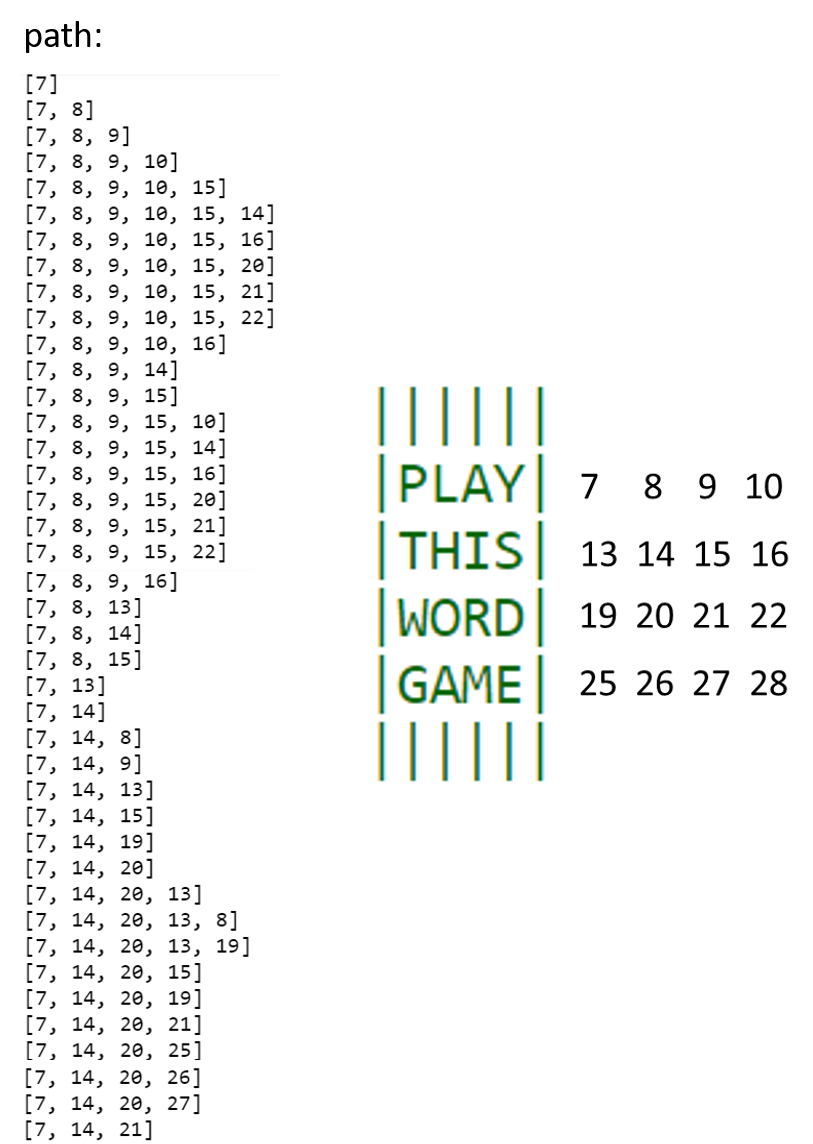

In [2]:
from IPython.display import Image

Image("Desktop\Path.png")